In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [2]:
!pip install ultralytics

In [3]:
from ultralytics import YOLO

# Clean up previous runs
!rm -rf /kaggle/working/*

In [4]:
def plot_bounding_boxes(image_path, label_path):
    # Open image
    image = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    
    # Read label file
    with open(label_path, 'r') as f:
        for line in f.readlines():
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            
            # Convert from YOLO format to matplotlib rectangle format
            img_width, img_height = image.size
            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height
            x_min = x_center - (width / 2)
            y_min = y_center - (height / 2)
            
            # Create a rectangle patch
            rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
    
    plt.show()

def pick_and_plot_images(data_path, num_images=3):
    image_files = []
    for root, _, files in os.walk(data_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                image_files.append(os.path.join(root, file))
    
    # Randomly pick images
    picked_images = random.sample(image_files, num_images)
    
    for image_file in picked_images:
        # Get corresponding label file
        label_file = image_file.replace('/images/', '/labels/').replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt')
        if os.path.exists(label_file):
            plot_bounding_boxes(image_file, label_file)

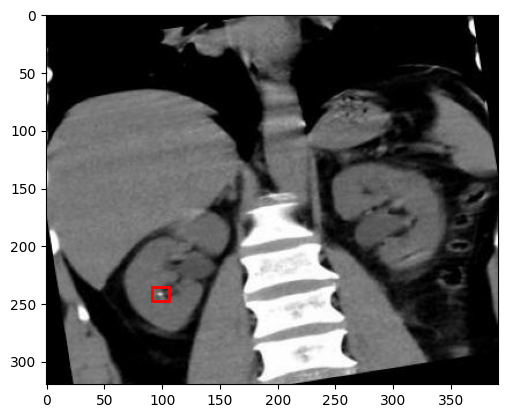

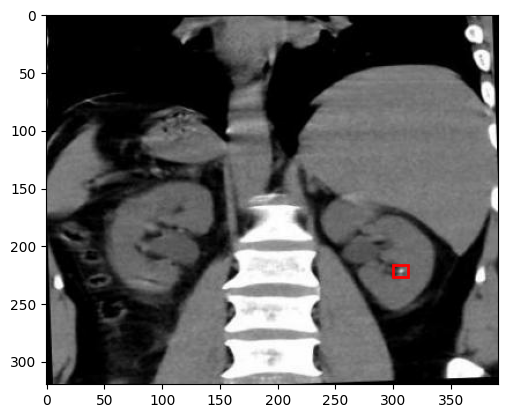

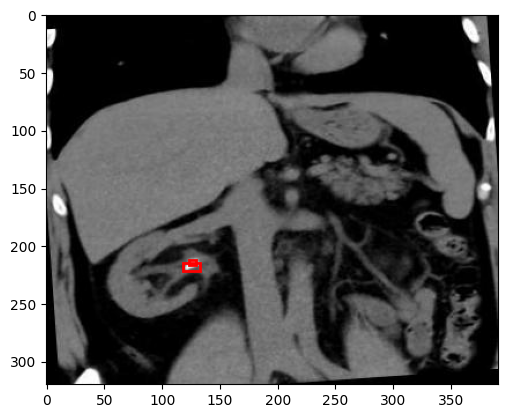

In [5]:
data_path = '/kaggle/input/kidney-stone-images/train/images'  
pick_and_plot_images(data_path, num_images=3)

In [6]:
model = YOLO('yolov8m.yaml')

# Customize training parameters
custom_params = {
    'data': '/kaggle/input/kidney-stone-images/data.yaml',
    'epochs': 100,
    'imgsz': 640,
    'batch': 32,
    'optimizer' : 'Adam',
    'lr0': 0.001 
}


In [7]:
model.train(**custom_params)

Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/kaggle/input/kidney-stone-images/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

2024-08-01 10:32:27,536	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-08-01 10:32:28,481	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 75.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/kidney-stone-images/train/labels... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:02<00:00, 351.42it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/kidney-stone-images/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/kidney-stone-images/valid/labels... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<00:00, 336.70it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/kidney-stone-images/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      14.2G      4.314      7.158      3.497        117        640: 100%|██████████| 33/33 [00:31<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all        123        325          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100        14G      3.026      2.045       2.09         72        640: 100%|██████████| 33/33 [00:30<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all        123        325          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.1G      2.589      1.735      1.712        127        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all        123        325      0.456       0.28      0.226     0.0787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      13.7G      2.428      1.576      1.527         75        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        123        325      0.574      0.443      0.412      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100        14G      2.345      1.413      1.463         92        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.302      0.379      0.232     0.0776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      13.7G      2.324      1.345      1.425         82        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        123        325      0.504      0.422      0.404      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      14.1G      2.244      1.327      1.375        115        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.526      0.514      0.468      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      13.7G      2.215      1.322       1.39         95        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.475       0.46      0.407      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      14.1G        2.2      1.262      1.368        129        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        123        325      0.501       0.48      0.404      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.7G        2.2      1.246      1.375         92        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        123        325      0.488      0.412       0.39      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100        14G      2.169      1.231      1.374         71        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.677      0.588      0.576      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.7G      2.141      1.211      1.344         88        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.685      0.542      0.565      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      14.1G      2.157      1.191      1.347        118        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        123        325      0.705      0.578      0.567      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      13.8G       2.08      1.154      1.315         81        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.704      0.571      0.598      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      14.1G       2.09      1.135      1.318         85        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.652      0.514      0.498      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      13.7G      2.148      1.159      1.343         90        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        123        325      0.673      0.551      0.565       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      14.1G      2.044      1.114      1.308         76        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        123        325      0.712       0.56      0.554      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      13.7G      2.106      1.121       1.31        128        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        123        325      0.641      0.618      0.584      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100        14G      2.049      1.125      1.317         71        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.674      0.575      0.545      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      13.6G      2.047      1.105      1.298         93        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        123        325      0.695      0.526      0.566      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      14.1G      2.033      1.095      1.262        117        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.741      0.641      0.649      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      13.7G      2.027      1.077      1.296         86        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        123        325      0.612      0.492      0.507      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.1G      2.038      1.087       1.29        105        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325       0.74       0.63      0.657      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      13.7G      2.057      1.065       1.28        110        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.734      0.618      0.625      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      14.1G      2.058      1.079      1.284        115        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        123        325      0.715      0.551      0.583      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      13.7G      1.977      1.036      1.259         68        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        123        325      0.768      0.582      0.628      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        14G      1.989       1.04      1.257         97        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.779      0.631      0.668      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      13.7G      2.008      1.038      1.253         83        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        123        325      0.735      0.598      0.615      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100        14G      1.967      1.007      1.227         84        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.764      0.622      0.656      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      13.7G      1.956       1.01      1.258         93        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.655      0.486      0.538      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      13.6G      1.935      0.989      1.216         88        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all        123        325      0.744      0.661      0.648      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      13.7G      1.942      1.015      1.241        107        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        123        325       0.72      0.634      0.626      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      14.1G       1.92     0.9951      1.252         93        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.732       0.62      0.633      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      13.7G      1.899     0.9835      1.213        133        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        123        325      0.803      0.634      0.658      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      13.6G      1.939     0.9943      1.232         87        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all        123        325      0.764      0.625      0.667      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      13.7G      1.942     0.9786      1.218        111        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.738      0.643       0.65      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      13.6G       1.92     0.9733      1.222         89        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        123        325      0.731      0.628      0.654      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      13.7G      1.927     0.9533       1.24         84        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325       0.73        0.6      0.597      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      14.1G       1.88     0.9301      1.218        107        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.708      0.622      0.602      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      13.8G      1.914     0.9591      1.231         88        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        123        325      0.755      0.654       0.64      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      14.1G      1.901     0.9377      1.222         85        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.777      0.663      0.654      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      13.7G      1.886     0.9701      1.198         88        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325      0.741      0.622      0.627       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100        14G      1.873     0.9328      1.184         85        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.776      0.648      0.636      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100        14G      1.851     0.9015      1.199        104        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.768      0.671      0.703      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      13.7G      1.925     0.9439      1.225        100        640: 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.745      0.649      0.639       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100        14G      1.865     0.8995      1.199        101        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325      0.758      0.677      0.697      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      13.7G      1.838     0.8993      1.224        101        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.778      0.646      0.685      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      13.5G      1.838     0.9049      1.175         85        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        123        325      0.787      0.637      0.679      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      13.7G      1.832     0.8882      1.185         71        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325       0.76      0.662      0.703      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      13.6G      1.819     0.8945      1.198         84        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        123        325      0.734      0.674      0.681      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      13.8G      1.811     0.8867      1.167        106        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.747      0.665       0.71      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      13.6G      1.835      0.898      1.197        103        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        123        325      0.709      0.658      0.657      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      13.7G      1.802     0.8711      1.181        136        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325       0.78      0.677      0.718      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      13.5G      1.814     0.8759       1.18         88        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        123        325      0.758      0.674      0.673      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      13.7G      1.778     0.8506      1.166         83        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.811      0.658       0.69      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      14.1G      1.801     0.8498      1.165        120        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.693      0.646      0.657      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      13.7G      1.799     0.8744      1.167         93        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.804      0.649      0.683      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100        14G      1.792     0.8639      1.152         87        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.817       0.66      0.688      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      13.7G      1.691     0.8147      1.132         84        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325      0.782      0.668      0.725      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      13.6G       1.76     0.8463      1.164        125        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        123        325      0.783      0.677      0.664      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      13.7G      1.794     0.8632      1.181         80        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        123        325      0.767      0.658      0.674      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      13.6G       1.75     0.8363      1.159         96        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        123        325      0.767      0.662      0.692      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      13.7G      1.713     0.8349      1.151         93        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325      0.784      0.646      0.709      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      13.6G      1.723     0.8253      1.153         83        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all        123        325      0.818       0.65      0.693      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      13.8G      1.733     0.8141      1.131        107        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.748      0.611      0.661      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100        14G      1.698     0.8026      1.144         97        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325      0.796      0.658      0.709      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      13.7G      1.695     0.8108      1.121         93        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.789      0.668      0.717      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      14.1G      1.702     0.8085      1.146        129        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        123        325      0.783      0.649      0.664      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      13.7G      1.735     0.8218      1.131         98        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325       0.82        0.7       0.73      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      14.1G      1.623     0.7627      1.118        105        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        123        325      0.794       0.68      0.723      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      13.7G      1.653     0.7754      1.112        113        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.771      0.673      0.674      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      13.6G      1.685      0.784      1.117         87        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        123        325      0.802      0.668      0.702      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      13.8G      1.646     0.7803      1.117         92        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.808      0.685      0.711      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100        14G      1.565     0.7428      1.101         75        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325      0.808      0.674      0.701      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      13.7G      1.614     0.7728      1.106         66        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325      0.765      0.658      0.687      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      13.5G      1.623     0.7542      1.099         74        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        123        325      0.776      0.658       0.69      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      13.7G      1.633     0.7536      1.124        101        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.821       0.68      0.722      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      14.1G      1.581     0.7451      1.097        121        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325      0.772      0.711       0.74      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      13.6G      1.567     0.7423      1.086        108        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325      0.775      0.655      0.666      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100        14G      1.559     0.7281      1.083         94        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.816      0.674      0.691      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      13.7G      1.533     0.7152      1.084        119        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.826      0.674      0.732      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      14.1G      1.581     0.7347       1.07         97        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.758      0.668      0.703      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      13.7G      1.553     0.7136      1.075         99        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325      0.163      0.686      0.134     0.0501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      14.1G      1.528     0.7188      1.069        115        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.798      0.686      0.676      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      13.7G      1.475     0.6908      1.052        102        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.796      0.684      0.715      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100        14G      1.524     0.7015      1.069        126        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.787      0.695      0.737      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      13.7G      1.483     0.6883      1.061        127        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325      0.816      0.653      0.716      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      13.6G      1.483      0.684      1.046        110        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        123        325      0.818      0.689      0.733      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      13.7G      1.453     0.6845      1.052        102        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.824      0.665      0.727      0.272


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        14G      1.516     0.7014      1.099         75        640: 100%|██████████| 33/33 [00:32<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.794      0.668      0.733      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      13.7G      1.464     0.6786       1.07         92        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all        123        325      0.824      0.668       0.72      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100        14G      1.443     0.6625      1.066         66        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        123        325      0.818      0.689      0.736      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      13.7G      1.412     0.6579      1.053         53        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325      0.811      0.685      0.707       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100        14G      1.437     0.6605      1.062         60        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325      0.817      0.686      0.733      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      13.7G      1.386     0.6409      1.047         69        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        123        325      0.811      0.685      0.741      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      13.5G      1.381     0.6509      1.036         65        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all        123        325      0.814      0.662      0.706       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      13.7G      1.369     0.6369      1.039         44        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.838      0.674       0.73      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100        14G      1.366     0.6339      1.038         65        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        123        325      0.828      0.665      0.716      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      13.7G      1.371     0.6394      1.043         62        640: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        123        325      0.797      0.678      0.721      0.282



100 epochs completed in 0.966 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]


                   all        123        325      0.772      0.711       0.74      0.296
Speed: 0.1ms preprocess, 8.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


lr/pg0,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr/pg1,▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▃▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇███▇██▇▇████▂██████
metrics/mAP50-95(B),▁▃▄▄▆▆▆▆▇▇▇▇▇▇▇▆▇▇▇▇▇█▇▇▇█▇▇▇████▂███▇▇█
metrics/precision(B),▁▅▅▅▇▇▇▆▇▇█▇▇█▇▇██▇█▇████████████▂██████
metrics/recall(B),▁▄▅▆▇▇▆▇▇▇▇▇█▇▇▇█▇▇▇██▇██▇▇▇██▇█████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▄▃▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea88892ebc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# Validate the model
model.val()

Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/input/kidney-stone-images/valid/labels... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<00:00, 757.65it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/kidney-stone-images/valid is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.43s/it]


                   all        123        325      0.781      0.714      0.741      0.297
Speed: 0.3ms preprocess, 18.6ms inference, 0.0ms loss, 15.2ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea888b0c6d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [20]:
def plot_bounding_boxes(image_path, label_path, ax, title):
    image = Image.open(image_path)
    ax.imshow(image)
    ax.set_title(title)
    ax.axis('off')
    with open(label_path, 'r') as f:
        for line in f.readlines():
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            img_width, img_height = image.size
            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height
            x_min = x_center - (width / 2)
            y_min = y_center - (height / 2)
            rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

def plot_predictions(image_path, predictions, ax, title):
    image = Image.open(image_path)
    ax.imshow(image)
    ax.set_title(title)
    for bbox in predictions:
        x_min, y_min, x_max, y_max = bbox[:4]
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='b', facecolor='none')
        ax.add_patch(rect)

def test_and_plot_images(model, data_path, num_images=3):
    image_files = []
    for root, _, files in os.walk(data_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                image_files.append(os.path.join(root, file))
    picked_images = random.sample(image_files, num_images)
    for image_file in picked_images:
        label_file = image_file.replace('/images/', '/labels/').replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt')
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        if os.path.exists(label_file):
            plot_bounding_boxes(image_file, label_file, ax1, 'Original Bounding Boxes')
        results = model(image_file)
        predictions = results[0].boxes.xyxy.cpu().numpy()
        plot_predictions(image_file, predictions, ax2, 'Predicted Bounding Boxes')
        plt.show()



image 1/1 /kaggle/input/kidney-stone-images/test/images/1-3-46-670589-33-1-63738790795811795900001-5522258459602207098_png_jpg.rf.eb9d2068c9f992781bb9814fb156c9e4.jpg: 544x640 3 Tas_Vars, 34.1ms
Speed: 3.4ms preprocess, 34.1ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


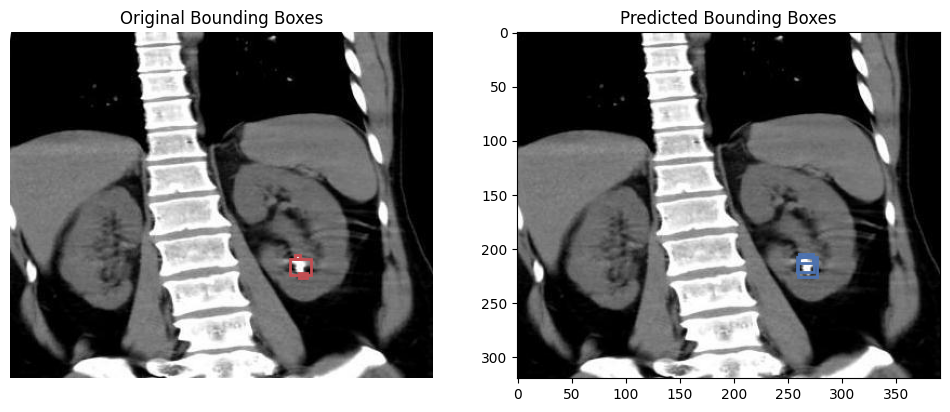


image 1/1 /kaggle/input/kidney-stone-images/test/images/1-3-46-670589-33-1-63741124800042198800001-5620738533970805933_png_jpg.rf.4fcc14fc70278a025316a0bd3ac8c041.jpg: 544x640 1 Tas_Var, 34.1ms
Speed: 2.4ms preprocess, 34.1ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


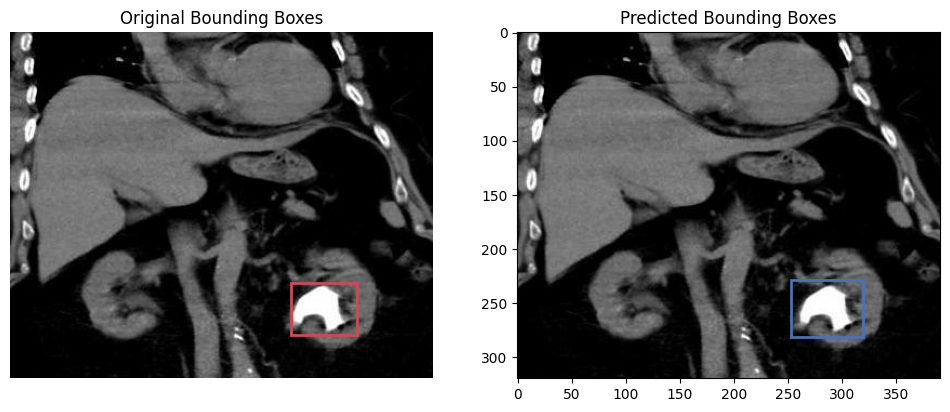


image 1/1 /kaggle/input/kidney-stone-images/test/images/1-3-46-670589-33-1-63740863580178781200001-5086422129430942692_png_jpg.rf.c140dab363dde8a657b4e0c672251779.jpg: 544x640 2 Tas_Vars, 34.1ms
Speed: 2.6ms preprocess, 34.1ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


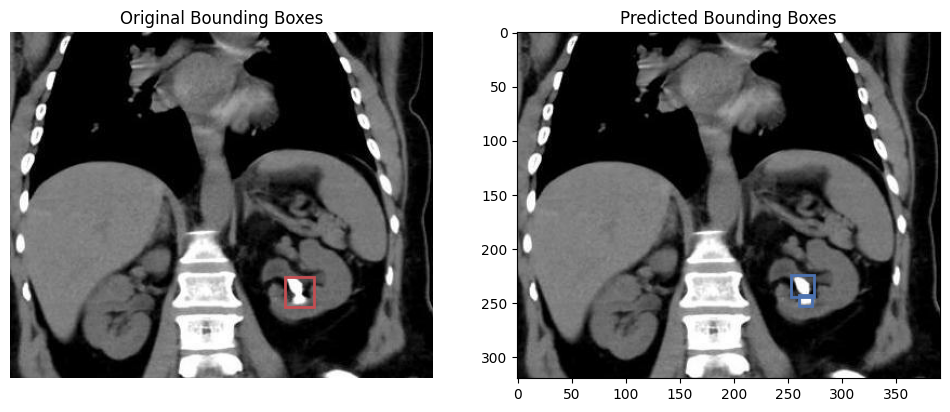

In [21]:
test_data_path = '/kaggle/input/kidney-stone-images/test/images'  
test_and_plot_images(model, test_data_path, num_images=3)